In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import files
uploaded=files.upload()


Saving Company_Data (1).csv to Company_Data (1).csv


In [3]:
data=pd.read_csv('Company_Data (1).csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
data['Sales']=data['Sales'].apply (lambda x:1 if x>7.00 else 0)

In [9]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<ipython-input-11-6987d4dd43ac>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


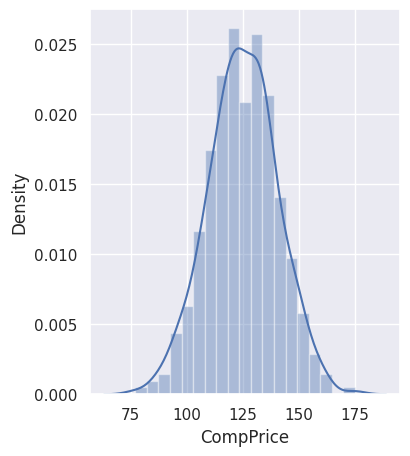

<ipython-input-11-6987d4dd43ac>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


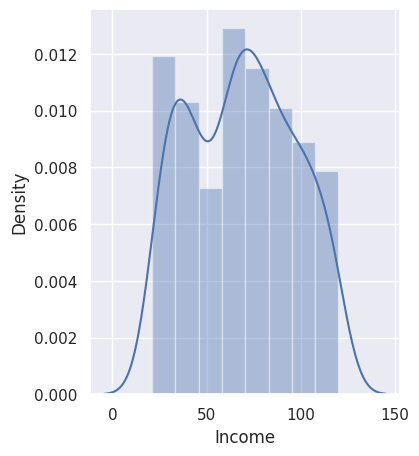

<ipython-input-11-6987d4dd43ac>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


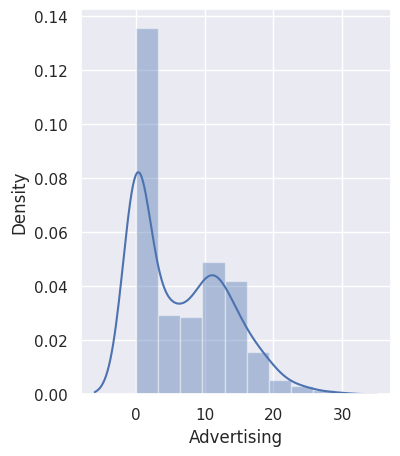

<ipython-input-11-6987d4dd43ac>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


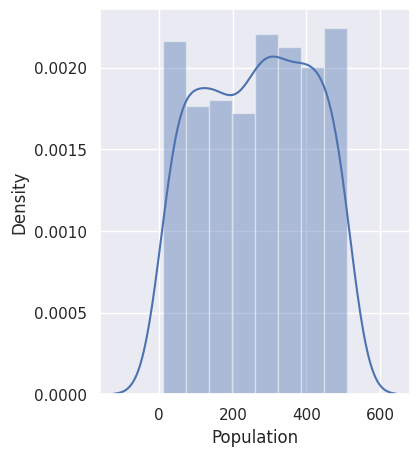

<ipython-input-11-6987d4dd43ac>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


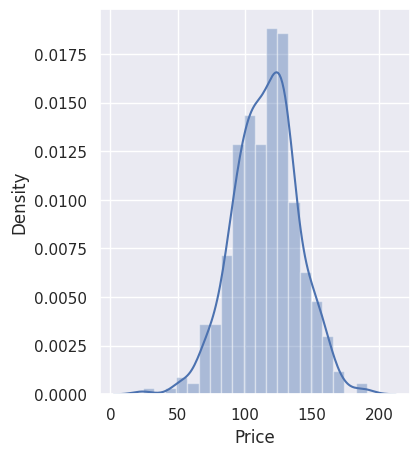

In [11]:
columns=['CompPrice', 'Income', 'Advertising', 'Population', 'Price']
sns.set(rc={'figure.figsize':(4,5)})
for i in columns:
  plt.show()
  print(sns.distplot(data[i]))

In [15]:
import plotly.express as px
columns=['ShelveLoc', 'Age', 'Education', 'Urban', 'US']
for i in columns:
  plt.show()
  fig=px.histogram(x=data[i])
  fig.show()

In [16]:
le=LabelEncoder()
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data['US']=le.fit_transform(data['US'])
data['Urban']=le.fit_transform(data['Urban'])

In [17]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [18]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
model=RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [26]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [27]:
accuracy=accuracy_score(y_test,y_pred_test)
accuracy

0.7875

In [28]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        25
           1       0.93      0.75      0.83        55

    accuracy                           0.79        80
   macro avg       0.77      0.81      0.77        80
weighted avg       0.83      0.79      0.79        80



# Bagging Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
model=BaggingClassifier(classifier,n_estimators=100)
model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [30]:
y_pred_test=model.predict(x_test)
y_pred_test

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [31]:
y_pred_train=model.predict(x_train)
y_pred_train

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [35]:
accur=accuracy_score(y_train,y_pred_train)
accur

1.0

In [34]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.98      0.78      0.87        55

    accuracy                           0.84        80
   macro avg       0.82      0.87      0.83        80
weighted avg       0.88      0.84      0.84        80



In [36]:
accu=accuracy_score(y_test,y_pred_test)
accu

0.8375

In [37]:
x=['RandomForestClassifier','BaggingClassifier']
y=[accuracy,accu]
fig=px.histogram(x=x,y=y)
fig.show()